Project 1: Problem 2.3

--------------------------------------------------------------------- Part (A) ---------------------------------------------------------------------

In [2]:
!pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 45.0 MB/s eta 0:00:00


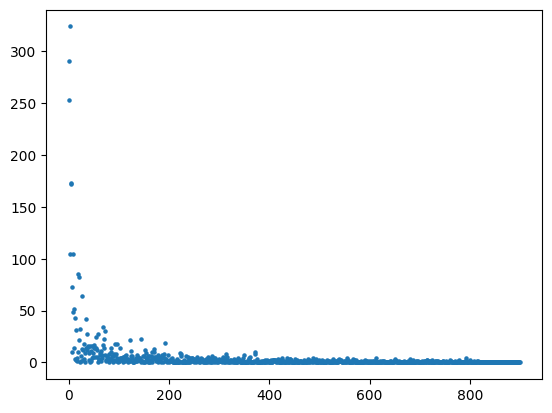

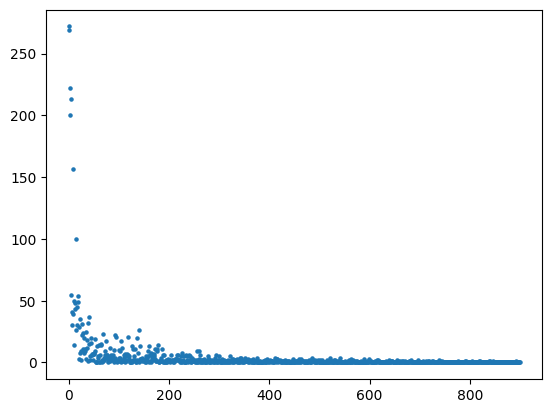

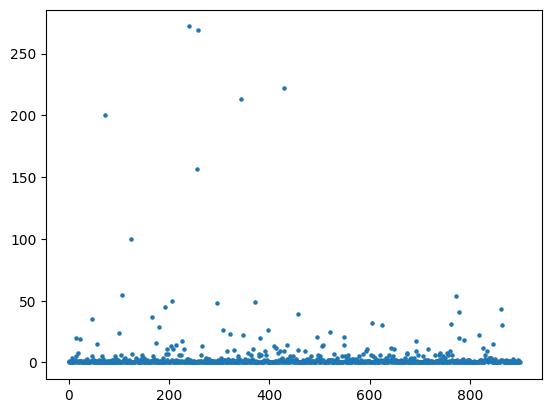

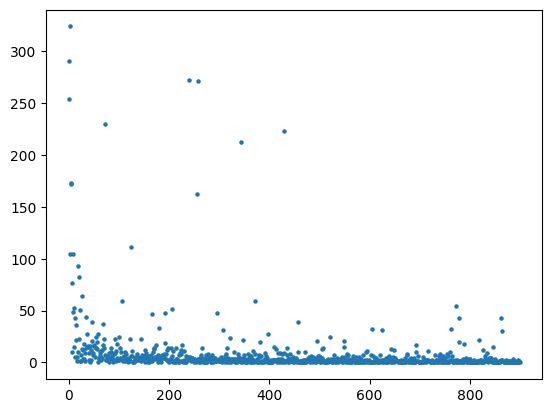

In [3]:
import igraph
import numpy as np
import matplotlib.pyplot as plt
from numpy import random

m = 4
n = 900

# Create the first graph
g1 = igraph.Graph.Barabasi(n, m, directed=True)
degrees1 = g1.indegree()

# Create the second graph
g2 = igraph.Graph.Barabasi(n, m, directed=True)
degrees2 = g2.indegree()

# Shuffle
g2 = g2.permute_vertices(list(np.random.permutation(n)))
degrees3 = g2.indegree()

# Merge the two graphs
g1.add_edges(g2.get_edgelist())
degrees4 = g1.indegree()

plt.scatter(range(900),degrees1, s=5)
plt.show()
plt.scatter(range(900),degrees2, s=5)
plt.show()
plt.scatter(range(900),degrees3, s=5)
plt.show()
plt.scatter(range(900),degrees4, s=5)
plt.show()

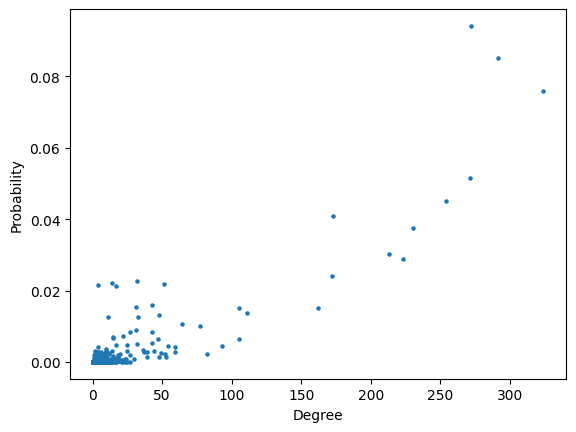

In [4]:
# # Calculate the probability for each node
# probs = []
# degrees = []

# for node in range(n):
#     pr = g1.personalized_pagerank(directed=True, reset_vertices=node)
#     probs.append(pr[node])
#     degrees.append(g1.indegree()[node])

# # Check if the probability is related to the degree of the nodes
# plt.scatter(degrees, probs, s=5)
# plt.xlabel('Degree')
# plt.ylabel('Probability')
# plt.show()


iters = 100
size = 900
p = np.zeros(size)
degrees = np.zeros(size)

for iter in range(iters):
  # Initialize a counter array to keep track of the number of times each node is visited
  visit_count = np.zeros(size)

  # Perform a random walk for 1000 steps
  steps = 1000
  current_node = np.random.choice(range(size))
  for i in range(steps):
      # Increment the counter for the current node
      visit_count[current_node] += 1
      # Choose a random outgoing edge from the current node
      neighbors = g1.successors(current_node)
      if len(neighbors) == 0:
          # If the current node has no outgoing edges, restart the random walk from a different node
          current_node = np.random.choice(range(size))
      else:
          # Choose a neighbor node uniformly at random
          next_node = np.random.choice(neighbors)
          current_node = next_node

  # Normalize the visit count array to obtain the probability of visiting each node
  p += (visit_count / np.sum(visit_count))

# Get the in-degree of each node in the original graph
degrees = g1.indegree()

p /= iters

plt.scatter(degrees, p, s=5)
plt.xlabel('Degree')
plt.ylabel('Probability')
plt.show()


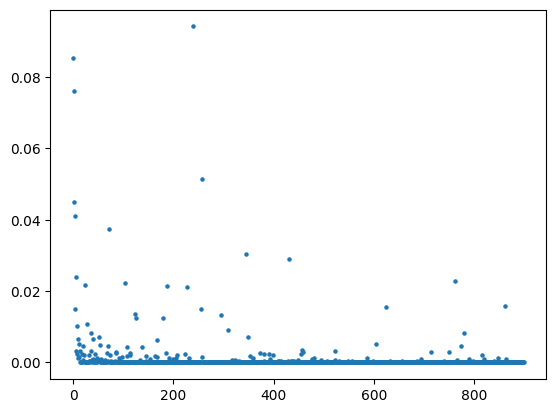

In [5]:
plt.scatter(range(len(p)),p, s=5)
plt.show()

------------------------------------------------------------------ Part (B) ------------------------------------------------------------------

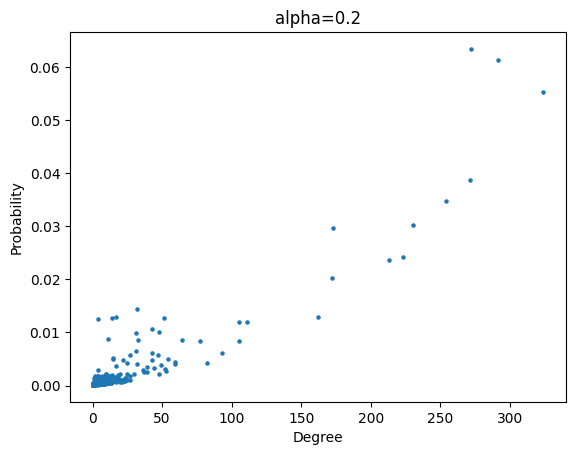

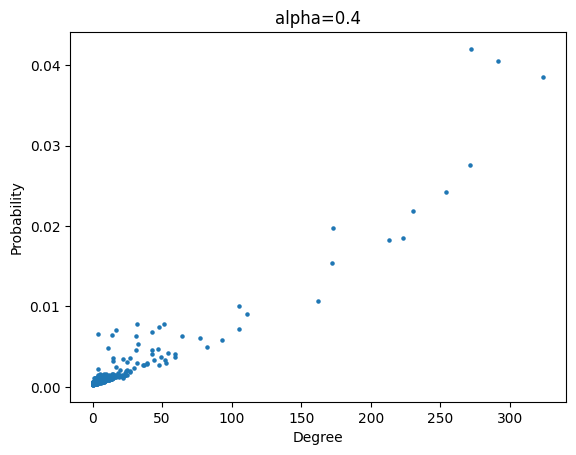

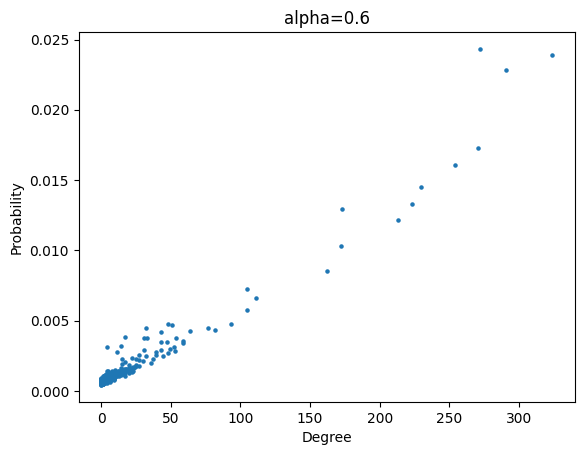

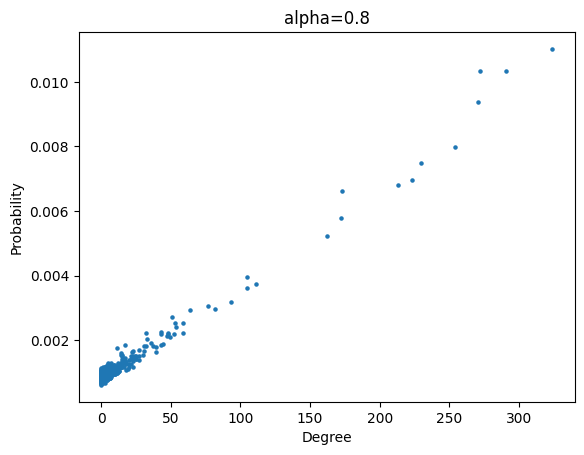

In [12]:

iters = 100
size = 900
p = np.array([np.zeros(size) for k in range(4)])
degrees = np.zeros(size)
alpha = 0.2
alphas = 0.2, 0.4, 0.6, 0.8
j = 0

for alpha in alphas:
  for iter in range(iters):

    visit_count = np.zeros(size)
    steps = 1000
    current_node = np.random.choice(range(size))

    for i in range(steps):
        # +1 visits
        visit_count[current_node] += 1
        neighbors = g1.successors(current_node)

        if len(neighbors) == 0:
            current_node = np.random.choice(range(size))
        else:
            # Choose next node from neighbors
            # 0.2 teleport
            x = random.randint(100)
            if(x < 100*alpha):
              next_node = np.random.choice(range(size))
            else:
              next_node = np.random.choice(neighbors)
            current_node = next_node

    # Normalize probability
    p[j] += (visit_count / np.sum(visit_count))
  j+=1

# degrees in
degrees = g1.indegree()

p /= iters

plt.scatter(degrees, p[0], s=5)
plt.xlabel('Degree')
plt.ylabel('Probability')
plt.title('alpha=0.2')
plt.show()

plt.scatter(degrees, p[1], s=5)
plt.xlabel('Degree')
plt.ylabel('Probability')
plt.title('alpha=0.4')
plt.show()

plt.scatter(degrees, p[2], s=5)
plt.xlabel('Degree')
plt.ylabel('Probability')
plt.title('alpha=0.6')
plt.show()

plt.scatter(degrees, p[3], s=5)
plt.xlabel('Degree')
plt.ylabel('Probability')
plt.title('alpha=0.8')
plt.show()
